In [1]:
f = open("data/2019-11-24-19-17-03/activation.txt", "r").readlines()

In [2]:
f1 = open('data/2020-01-07-13-14-19/color_diff_base_tsttrl.csv', 'r').readlines()
f1

['_H:\t|Run\t|Epoch\t|Trial\t$TrialName\t#SSE\t#AvgSSE\t#CosDiff\t#Hidden_ActM.Avg\t#Output_ActM.Avg\t#ObjAct[2:0,0]<2:1,2>\t#ObjAct[2:0,1]\t#FaceAct[4:0,0,0,0]<4:1,2,2,1>\t#FaceAct[4:0,0,1,0]\t#FaceAct[4:0,1,0,0]\t#FaceAct[4:0,1,1,0]\t#OutActM[2:0,0]<2:1,50>\t#OutActM[2:0,1]\t#OutActM[2:0,2]\t#OutActM[2:0,3]\t#OutActM[2:0,4]\t#OutActM[2:0,5]\t#OutActM[2:0,6]\t#OutActM[2:0,7]\t#OutActM[2:0,8]\t#OutActM[2:0,9]\t#OutActM[2:0,10]\t#OutActM[2:0,11]\t#OutActM[2:0,12]\t#OutActM[2:0,13]\t#OutActM[2:0,14]\t#OutActM[2:0,15]\t#OutActM[2:0,16]\t#OutActM[2:0,17]\t#OutActM[2:0,18]\t#OutActM[2:0,19]\t#OutActM[2:0,20]\t#OutActM[2:0,21]\t#OutActM[2:0,22]\t#OutActM[2:0,23]\t#OutActM[2:0,24]\t#OutActM[2:0,25]\t#OutActM[2:0,26]\t#OutActM[2:0,27]\t#OutActM[2:0,28]\t#OutActM[2:0,29]\t#OutActM[2:0,30]\t#OutActM[2:0,31]\t#OutActM[2:0,32]\t#OutActM[2:0,33]\t#OutActM[2:0,34]\t#OutActM[2:0,35]\t#OutActM[2:0,36]\t#OutActM[2:0,37]\t#OutActM[2:0,38]\t#OutActM[2:0,39]\t#OutActM[2:0,40]\t#OutActM[2:0,41]\t#OutActM[2

['Training Run:\t0\tTask:\tTaskShapes\tEpoch:\t0\tTrial:\t0\tName:\tNrp2\t\t\t\n',
 'Neuron 0\n',
 '[8.163627e-29 7.0899807e-29 5.1948325e-29 3.6689125e-29 2.5580846e-29 1.7829104e-29 1.2426345e-29 8.660786e-30 6.0363053e-30 4.2071217e-30 2.9322362e-30 2.9700312e-28 7.8428096e-21 3.7430402e-18 2.3002698e-17 6.616738e-17 1.3734586e-16 2.0593907e-16 2.6522187e-16 3.3813537e-16 3.9201e-16 4.582814e-16 4.989137e-16 5.400263e-16 5.56579e-16 5.865108e-16 6.2665737e-16 6.385715e-16 6.618924e-16 6.598255e-16 6.7583573e-16 7.028616e-16 6.976929e-16 7.0769465e-16 7.298949e-16 7.1885897e-16 7.236936e-16 7.400161e-16 7.245157e-16 7.2649243e-16 7.4294223e-16 7.248193e-16 7.255661e-16 7.401815e-16 7.2449724e-16 7.256647e-16 7.390298e-16 7.1731785e-16 7.1748376e-16 7.3420064e-16 7.21807e-16 7.253308e-16 7.401517e-16 7.2513003e-16 7.233996e-16 7.397815e-16 7.293571e-16 7.353806e-16 7.5181734e-16 7.3422404e-16 7.3360724e-16 7.477188e-16 7.2733586e-16 7.2897747e-16 7.48534e-16 7.3796046e-16 7.4079305e-1

In [32]:
from collections import defaultdict
def format_acts_line(line):
    acts = line.split(" ")
    acts[0] = acts[0][1:] # get rid of beginning [
    acts[-1] = acts[-1][:-2] # get rid of ending \n]
    acts = [float(act) for act in acts] # convert to floats
    return acts

acts_through_epochs = []
task_acts = {}
retrieve_lines = [idx for idx, line in enumerate(f) if "TaskRetrievalPractice" in line]
minimum = min(retrieve_lines)
maximum = max(retrieve_lines)
for line_id in range(minimum, maximum+10):
#     if line_id % 9 == 0: # first line are counters
#         task = (line.split("\t"))[3]
#         if task != "TaskRetrievalPractice":
#             line_id += 9
    line = f[line_id]
    if line_id % 9 == 2: # neuron 0
        acts = format_acts_line(line)
        task_acts["neuron0"] = acts
    if line_id % 9 == 4: # neuron 1
        acts = format_acts_line(line)
        task_acts["neuron1"] = acts
    if line_id % 9 == 6: # neuron 2
        acts = format_acts_line(line)
        task_acts["neuron2"] = acts
    if line_id % 9 == 8: # neuron 3
        acts = format_acts_line(line)
        task_acts["neuron3"] = acts
        acts_through_epochs.append(task_acts.copy())
        task_acts = {}

Epoch 0


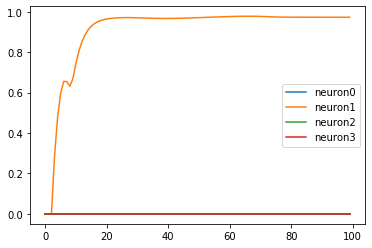

Epoch 1


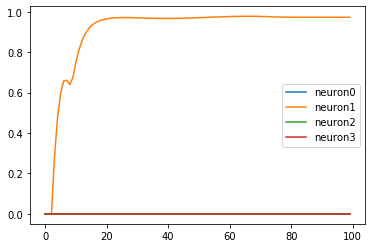

Epoch 2


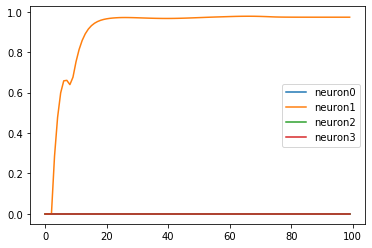

Epoch 3


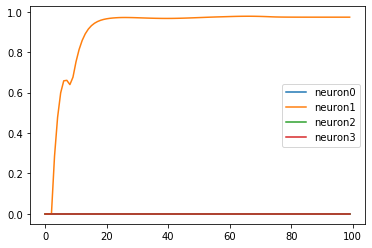

Epoch 4


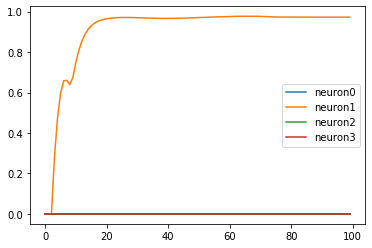

Epoch 5


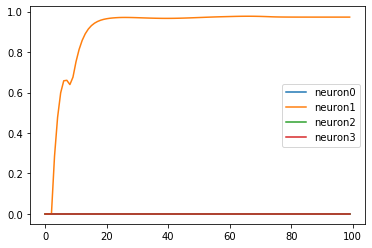

Epoch 6


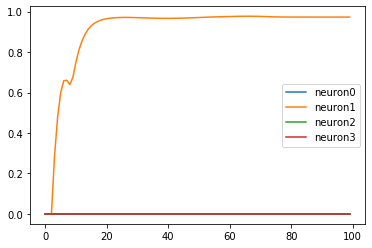

Epoch 7


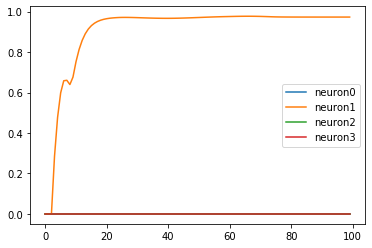

Epoch 8


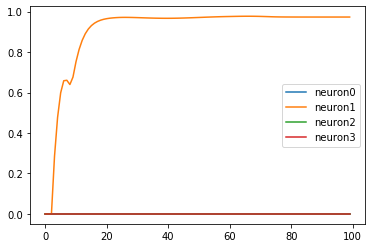

Epoch 9


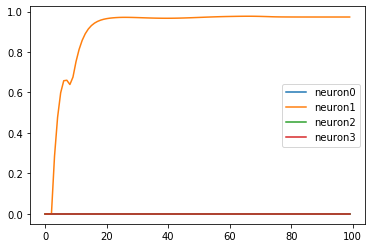

Epoch 10


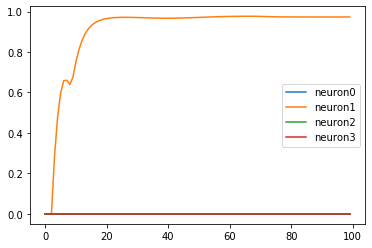

Epoch 11


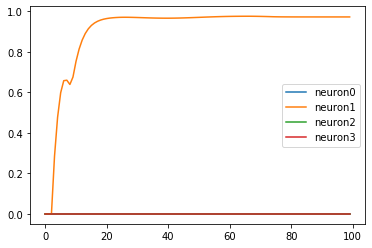

Epoch 12


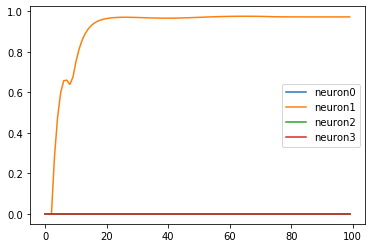

Epoch 13


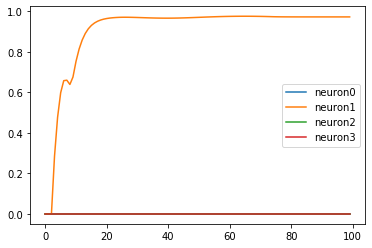

Epoch 14


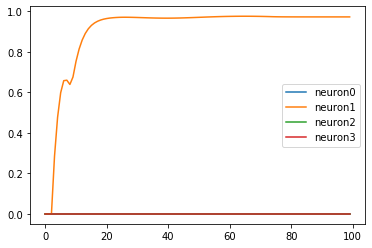

Epoch 15


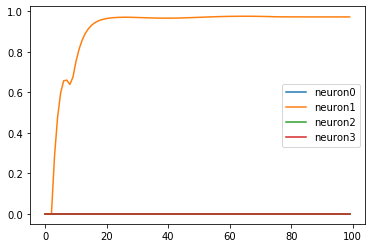

In [40]:
import matplotlib.pyplot as plt
neurons = ["neuron0", "neuron1", "neuron2", "neuron3"]
for epoch in range(len(acts_through_epochs)):
    plt.figure()
    print("Epoch", epoch)
    for neuron in neurons:
        plt.plot(acts_through_epochs[epoch][neuron], label=neuron)
    plt.legend()
    plt.show()

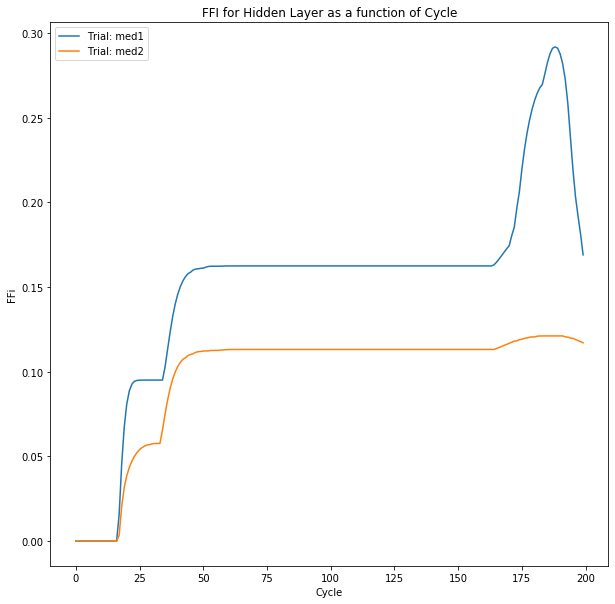

In [1]:
import matplotlib.pyplot as plt
f = open("hidden_ffi.txt", "r").readlines()
vals = [line.split(" ")[-1].strip('\n') for line in f]
plt.figure(figsize=(10,10))
for i in range(2):
    plt.plot([float(v) for v in vals[i*200 : (i*200+200) ]],label=f"Trial: med{i+1}" )
plt.legend()
plt.title("FFI for Hidden Layer as a function of Cycle")
plt.xlabel("Cycle")
plt.ylabel("FFi")
plt.show()


128


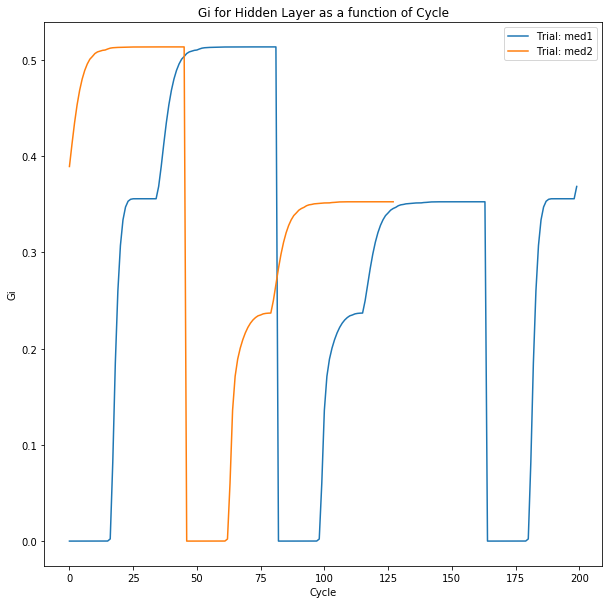

In [12]:
f = open("hidden_gi.txt", "r").readlines()
vals = [line.split(" ")[-1].strip('\n') for line in f]
plt.figure(figsize=(10,10))
for i in range(2):
    values = [float(v) for v in vals[i*200 : (i*200+200) ]]
    plt.plot(values,label=f"Trial: med{i+1}" )
    if i == 1:
        print(len(values))
plt.legend()
plt.title("Gi for Hidden Layer as a function of Cycle")
plt.xlabel("Cycle")
plt.ylabel("Gi")
plt.show()


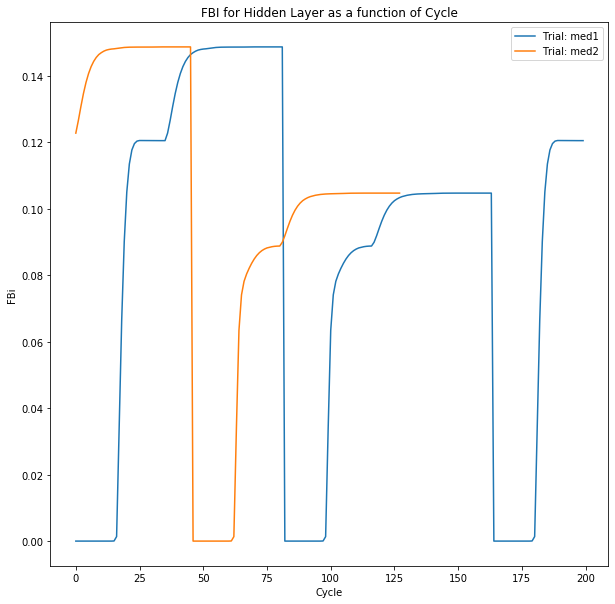

In [3]:
f = open("hidden_fbi.txt", "r").readlines()
vals = [line.split(" ")[-1].strip('\n') for line in f]
plt.figure(figsize=(10,10))
for i in range(2):
    plt.plot([float(v) for v in vals[i*200 : (i*200+200) ]],label=f"Trial: med{i+1}" )
plt.legend()
plt.title("FBI for Hidden Layer as a function of Cycle")
plt.xlabel("Cycle")
plt.ylabel("FBi")
plt.show()


In [6]:
f = open("hidden_fbi.txt", "r").readlines()
vals = [line.split(" ")[-1].strip('\n') for line in f]
fb=[float(v) for v in vals[i*200 : (i*200+200) ]]

f = open("hidden_gi.txt", "r").readlines()
vals = [line.split(" ")[-1].strip('\n') for line in f]
gi=[float(v) for v in vals[i*200 : (i*200+200) ]]

In [5]:
gi

[0.12273727,
 0.12654282,
 0.13075554,
 0.13466999,
 0.13799001,
 0.14065969,
 0.14273544,
 0.1443136,
 0.1454948,
 0.14636888,
 0.14694509,
 0.1474012,
 0.14772247,
 0.14790872,
 0.14803208,
 0.14810452,
 0.1482122,
 0.14834577,
 0.14844896,
 0.14851007,
 0.1485597,
 0.1485934,
 0.14861226,
 0.14862236,
 0.1486234,
 0.14862134,
 0.14861926,
 0.148618,
 0.14861746,
 0.14861733,
 0.14863431,
 0.14865279,
 0.14866562,
 0.14867236,
 0.1486751,
 0.148676,
 0.14867614,
 0.1486761,
 0.14867604,
 0.14867602,
 0.14867604,
 0.1486761,
 0.14867613,
 0.14867614,
 0.14867619,
 0.1486762,
 0.0,
 9.3298637e-29,
 1.2028879e-28,
 1.9408998e-28,
 2.5942063e-27,
 1.6304395e-25,
 1.8166998e-23,
 2.657334e-21,
 4.262927e-19,
 6.661842e-17,
 9.392684e-15,
 1.1386982e-12,
 1.15353324e-10,
 9.614972e-09,
 6.413996e-07,
 3.5353085e-05,
 0.001337838,
 0.03395604,
 0.06340163,
 0.07408151,
 0.07815759,
 0.080359526,
 0.082082555,
 0.08359107,
 0.08488226,
 0.085936934,
 0.08676392,
 0.08739259,
 0.08785972,
 0.

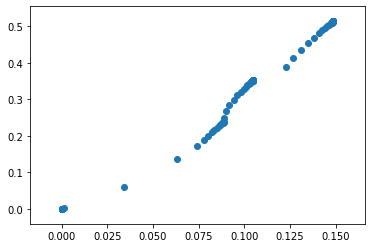

In [8]:
plt.scatter(fb,gi)

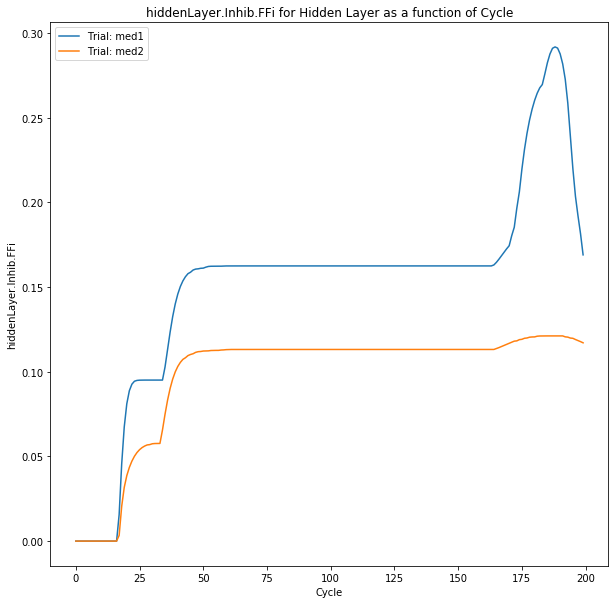

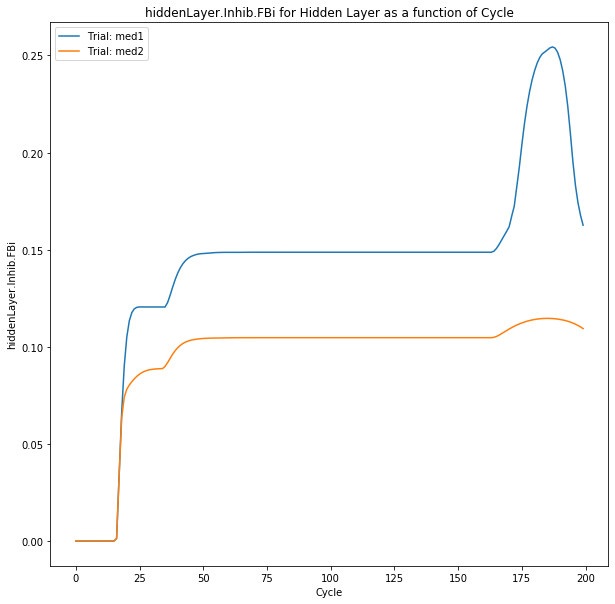

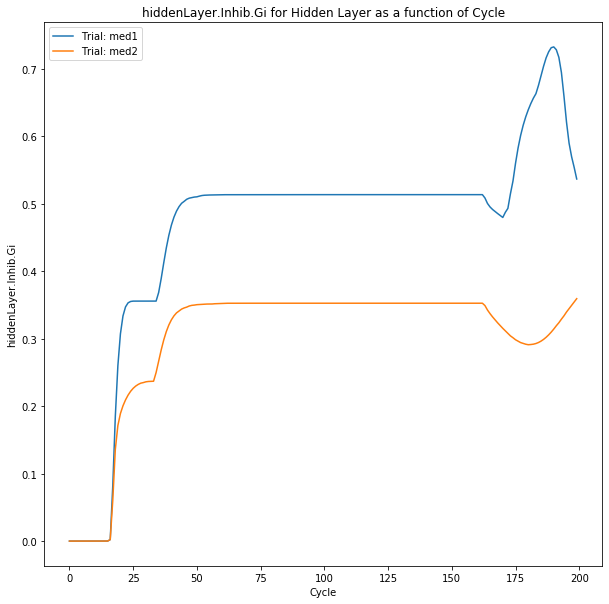

In [34]:
f = open("log.txt", "r").readlines()
def plot_inhib(inhibtype = "hiddenLayer.Inhib.FFi", f = f):
    vals = [line.split(" ")[-1].strip('\n') for line in f if inhibtype in line]
    plt.figure(figsize=(10,10))
    for i in range(2):
        values = [float(v) for v in vals[i*200 : (i*200+200) ]]
        plt.plot(values,label=f"Trial: med{i+1}" )
    plt.legend()
    plt.title(f"{inhibtype} for Hidden Layer as a function of Cycle")
    plt.xlabel("Cycle")
    plt.ylabel(f"{inhibtype}")
    plt.show()
plot_inhib("hiddenLayer.Inhib.FFi")
plot_inhib("hiddenLayer.Inhib.FBi")
plot_inhib("hiddenLayer.Inhib.Gi")

In [28]:
vals = [line  for line in f if "hiddenLayer.Inhib.FFi" in line]

In [29]:
vals[:200]

['epoch 0 trial  cyc 0 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 1 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 2 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 3 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 4 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 5 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 6 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 7 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 8 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 9 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 10 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 11 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 12 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 13 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 14 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 15 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 16 hiddenLayer.Inhib.FFi 0\n',
 'epoch 0 trial  cyc 17 hiddenLayer.Inhib.FFi 0.0156926\n',
 'epoch 0 trial  cyc 18 hiddenLayer.Inhib.FFi 0.04557744\n',
 'epo

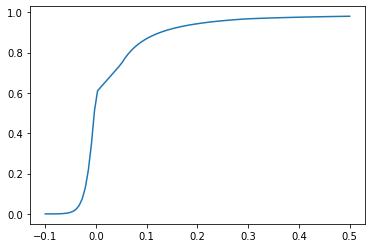

In [85]:
import math
import matplotlib.pyplot as plt
import numpy as np 

def XX1(x):
    return x / (x + 1)

def XX1GainCor(x, GainCorRange, NVar, Gain, GainCor):
    
    gainCorFact = (GainCorRange - (x / NVar)) / GainCorRange
    if gainCorFact < 0: 
        return XX1(Gain * x)

    newGain = Gain * (1 - GainCor*gainCorFact)
    return XX1(newGain * x)

def NoisyXX1(x):
    """
    Default values
    Gain = 100
    SigMult = 0.33
    NVar = 0.005
    SigMultPow = 0.8
    SigGain = 3.0
    InterpRange = 0.01
    GainCorRange = 10.0
    GainCor = 0.1
    """
    
    # gain (gamma) of the rate-coded activation functions -- 100 is default, 
    # 80 works better for larger models, and 20 is closer to 
    # the actual spiking behavior of the AdEx model -- 
    # use lower values for more graded signals, 
    # generally in lower input/sensory layers of the network
    Gain = 100
    # multiplier on sigmoid used for computing values for net < thr
    SigMult = 0.5
    # variance of the Gaussian noise kernel for convolving with XX1 
    # in NOISY_XX1 and NOISY_LINEAR -- determines the level of 
    # curvature of the activation function near the threshold -- 
    # increase for more graded responding there -- note that this 
    # is not actual stochastic noise, just constant convolved 
    # gaussian smoothness to the activation function
    NVar = 0.03
    
    # power for computing sig_mult_eff as function of gain * nvar
    SigMultPow = 0.8
    
    # gain multipler on (net - thr) for sigmoid used for computing values for net < thr
    SigGain = 3.0
    
    # interpolation range above zero to use interpolation
    InterpRange = 0.05
    
    # range in units of nvar over which to apply gain 
    # correction to compensate for convolution
    GainCorRange = 10.0
    
    # gain correction multiplier -- how much to correct gains
    GainCor = 0.5
    
    
    SigMultEff = SigMult * math.pow(Gain*NVar, SigMultPow)
    SigGainNVar = SigGain / NVar
    
    SigValAt0 = 0.5 * SigMultEff
    InterpVal = XX1GainCor(InterpRange, GainCorRange, NVar, Gain, GainCor) - SigValAt0
    
    if x < 0:
        return SigMultEff / (1 + math.exp(-(x * SigGainNVar)))
    elif x < InterpRange :
        interp = 1 - ((InterpRange - x) / InterpRange)
        return SigValAt0 + interp*InterpVal
    else:
        return XX1GainCor(x, GainCorRange, NVar, Gain, GainCor)

xs = np.linspace(-0.1, 0.5, 100)
y = [NoisyXX1(x) for x in xs]
plt.plot(xs, y)
d = {xs[i]:y[i] for i in range(len(y))}

In [86]:
[(k, d[k]) for k in d if k < 0]

[(-0.1, 5.466413403416713e-05),
 (-0.09393939393939395, 0.00010020625290214456),
 (-0.08787878787878789, 0.00018368491308433585),
 (-0.08181818181818182, 0.00033668755799164704),
 (-0.07575757575757576, 0.0006170703470919174),
 (-0.0696969696969697, 0.0011307277629529614),
 (-0.06363636363636364, 0.002071224460095081),
 (-0.05757575757575758, 0.0037915252935578157),
 (-0.05151515151515152, 0.0069324192795016115),
 (-0.04545454545454546, 0.012647808823622049),
 (-0.0393939393939394, 0.022984749013075255),
 (-0.03333333333333334, 0.041475885246346614),
 (-0.027272727272727282, 0.07391215725416289),
 (-0.021212121212121224, 0.12890281056262953),
 (-0.015151515151515152, 0.2169528599168608),
 (-0.009090909090909094, 0.3458040884869646),
 (-0.003030303030303036, 0.5115272341962901)]

In [3]:
with open("log.txt", "r") as f:
    v = f.readlines()

In [9]:
i = 0
gis = []
for line in v:
    if "Cycle" in line:
        gi = float(line.split(" ")[-1])
        gis.append(gi)

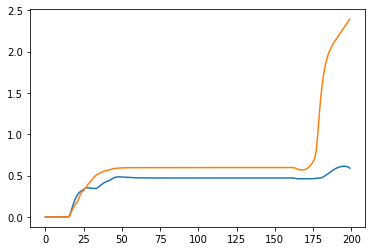

In [14]:
import matplotlib.pyplot as plt
plt.plot(gis)
plt.plot(gi_news)

In [13]:
with open("log.txt", "r") as f:
    v = f.readlines()
i = 0
gi_news = []
for line in v:
    if "Cycle" in line:
        gi = float(line.split(" ")[-1])
        gi_news.append(gi)